In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i,sequence in  enumerate(sequences):
        results[i,sequence] = 1.
        return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [3]:
from tensorflow.keras.utils import to_categorical

# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, labels] = 1.
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape = (10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
one_hot_train_labels = one_hot_train_labels[1000:]

history = model.fit(x_train, one_hot_train_labels, epochs=10, batch_size = 512, validation_data = (x_val, y_val))

Train on 6982 samples, validate on 1000 samples
Epoch 1/10
6982/6982 [==============================] - 1s 126us/sample - loss: 3.8206 - accuracy: 0.3306 - val_loss: 3.8109 - val_accuracy: 0.3260
Epoch 2/10
6982/6982 [==============================] - 0s 62us/sample - loss: 3.8028 - accuracy: 0.3551 - val_loss: 3.7933 - val_accuracy: 0.3260
Epoch 3/10
6982/6982 [==============================] - 0s 64us/sample - loss: 3.7852 - accuracy: 0.3551 - val_loss: 3.7759 - val_accuracy: 0.3260
Epoch 4/10
6982/6982 [==============================] - 0s 62us/sample - loss: 3.7677 - accuracy: 0.3551 - val_loss: 3.7585 - val_accuracy: 0.3260
Epoch 5/10
6982/6982 [==============================] - 0s 62us/sample - loss: 3.7504 - accuracy: 0.3551 - val_loss: 3.7414 - val_accuracy: 0.3260
Epoch 6/10
6982/6982 [==============================] - 0s 64us/sample - loss: 3.7332 - accuracy: 0.3551 - val_loss: 3.7243 - val_accuracy: 0.3260
Epoch 7/10
6982/6982 [==============================] - 0s 64us/sampl

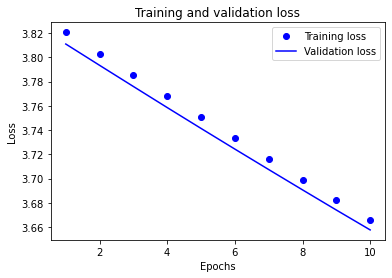

In [9]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()